# Método de Newton-Raphson

In [17]:
#importar las funciones de la biblioteca math
import numpy as np
import matplotlib.pyplot as plt
import math 
import cmath 

def newtonRaphson(f,df,x,imax=100,tol=1e-8):
    cumple=False
    print('{:^10s} {:^10s} {:^10s}'.\
          format('x','f(x)','df(x)'))
    k=0
    while (not cumple and k<imax):
        if df(x)!=0:
            x=x-f(x)/df(x)
        else:
            x=x+tol
        print('{:10.5f} {:10.5f} {:10.5f}'.\
              format(x,f(x),df(x)))
        cumple=abs(f(x))<=tol
        k+=1
    if k<imax:
        return x
    else:
        raise ValueError ('La funcion no converge')



## Ejemplo 
$f(x)= e^{-x}-sen(x)$

    x         f(x)      df(x)   
   0.54471    0.06184   -1.43529
   0.58780    0.00102   -1.38772
   0.58853    0.00000   -1.38690
   0.58853    0.00000   -1.38690
f(5.885327e-01)=2.620126e-14


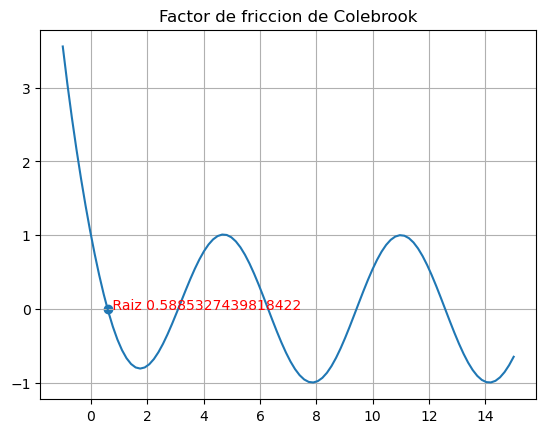

In [21]:
# Funcion a evaluar
def f(x):
    return np.exp(-x)-np.sin(x)
# Derivada
def df(x):
    return -np.exp(-x)-np.cos(x)

def main():
    # valores iniciales
    x0=0.2
    # Llamada al algoritmo
    raiz=newtonRaphson(f,df,x0)
    print('f({:e})={:e}'.format(raiz,f(raiz)))
    
    x=np.linspace(-1,15,100)
    y=f(x)
    
    fig = plt.figure()
    plt.plot(x,y)
    plt.title('Factor de friccion de Colebrook')
    plt.scatter(raiz,f(raiz))
    plt.text(raiz,f(raiz),' Raiz '+str(raiz),color='red')
    plt.grid()
    
    plt.show()
    fig.savefig("newtonraphson.pdf", bbox_inches='tight')
    
if __name__ == "__main__": main()

# Método de Newton-Raphson Mejorado

In [23]:
#importar las funciones de la biblioteca math
import numpy as np
import matplotlib.pyplot as plt
import math 
import cmath 

def newtonRaphsonM(f,df,d2f,x,imax=100,tol=1e-8):
    cumple=False
    print('{:^10s} {:^10s} {:^10s} {:^10s}'.\
          format('x','f(x)','df(x)','d2f(x)'))
    k=0
    while (not cumple and k<imax):
        x=x-(f(x)*df(x))/(df(x)**2-f(x)*d2f(x))
        print('{:10.5f} {:10.5f} {:10.5f} {:10.5f}'.\
              format(x,f(x),df(x),d2f(x)))
        cumple=abs(f(x))<=tol
        k+=1
    if k<imax:
        return x
    else:
        raise ValueError ('La funcion no converge')



## Ejemplo
$f(x)=(x-2)^2 (x-4)$

    x         f(x)      df(x)      d2f(x)  
   2.10526   -0.02099   -0.38781   -3.36842
   2.00308   -0.00002   -0.01230   -3.98151
   2.00000   -0.00000   -0.00001   -3.99999
f(2.000002e+00)=-1.134301e-11


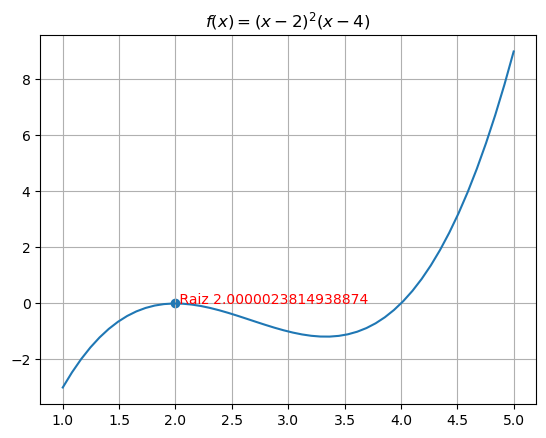

In [25]:
# Funcion a evaluar
def f(x):
    return (x-2)**2 *(x-4)
# Derivada
def df(x):
    return (x - 4)*(2*x - 4) + (x - 2)**2
# Segunda derivada
def d2f(x):
    return 2*(3*x - 8)

def main():
    # valores iniciales
    x0=1
    # Llamada al algoritmo
    raiz=newtonRaphsonM(f,df,d2f,x0)
    print('f({:e})={:e}'.format(raiz,f(raiz)))
    
    x=np.linspace(1,5)
    y=f(x)
    
    fig = plt.figure()
    plt.plot(x,y)
    plt.title('$f(x)=(x-2)^2 (x-4)$')
    plt.scatter(raiz,f(raiz))
    plt.text(raiz,f(raiz),' Raiz '+str(raiz),color='red')
    plt.grid()
    
    plt.show()
    fig.savefig("newtonraphsonm.pdf", bbox_inches='tight')
    
if __name__ == "__main__": main()

# Método de la Secante

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import cmath 

def secante(f,x0,x1,imax=100,tol=1e-8):
    cumple=False
    print('{:^10s} {:^10s} {:^10s} {:^10s} {:^14s} '.\
          format('n','x0','x1','x','f(x)'))
    k=0
    while (not cumple and k<imax):
        x=x1-f(x1)*(x0-x1)/(f(x0)-f(x1))
        print('{:^10d} {:10.5f} {:10.5f} {:10.5f} {:10.8f} '.\
              format(k,x0,x1,x,f(x)))
        x0=x1
        x1=x
        cumple=abs(f(x))<tol
        k+=1
    if k<imax:
        return x
    else:
        raise ValueError ('La funcion no converge')



## Ejemplo
Aplicar el método de la secante para obtener una solución de la ecuación $x-0.5 \tan (x)=0$ con una precisión de $\varepsilon=10^{-6}$ en el intervalo [1,2].

    n          x0         x1         x           f(x)      
    0         1.20000    1.00000    1.14399 0.04450737 
    1         1.00000    1.14399    1.18024 -0.03422837 
    2         1.14399    1.18024    1.16448 0.00237939 
    3         1.18024    1.16448    1.16551 0.00011712 
    4         1.16448    1.16551    1.16556 -0.00000043 
f(1.165561e+00)=-4.272530e-07


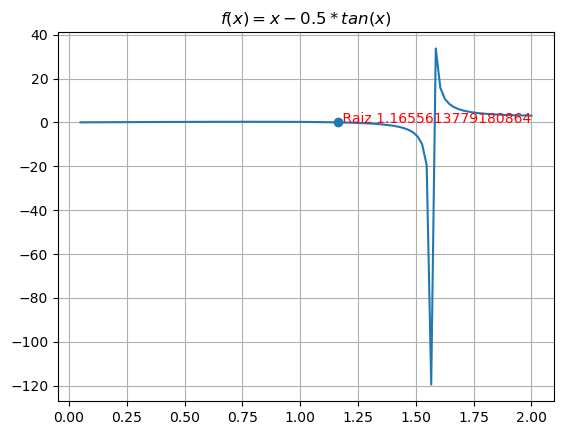

In [52]:
# Funcion a evaluar
def f(x):
    return x-0.5*np.tan(x)

def main():
    # valores iniciales
    x0=1.2
    x1=1
    # Llamada al algoritmo
    raiz=secante(f,x0,x1,100,1e-6)
    print('f({:e})={:e}'.format(raiz,f(raiz)))
    
    x=np.linspace(0.05,2,100)
    y=f(x)
    
    fig = plt.figure()
    plt.plot(x,y)
    plt.title('$f(x)=x-0.5* tan (x)$')
    plt.scatter(raiz,f(raiz))
    plt.text(raiz,f(raiz),' Raiz '+str(raiz),color='red')
    plt.grid()
    
    plt.show()
    fig.savefig("secante.pdf", bbox_inches='tight')
    
if __name__ == "__main__": main()

# Fractal de Newton

## Ejemplo:  $f(x)=x^2-2$

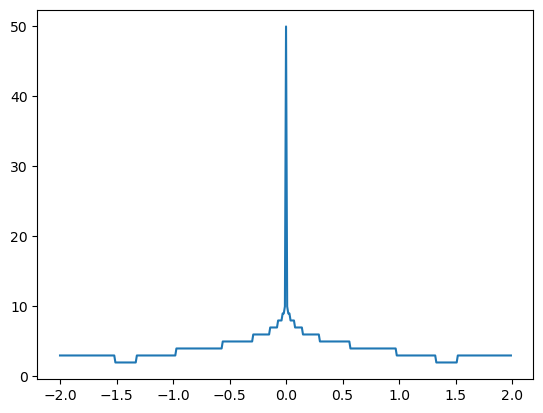

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#definición del método de Newton-Raphson
def nr(f,df,x0,tol=1e-5):
    k=0
    while np.abs(f(x0))>tol and k<50:
        x0=x0-f(x0)/df(x0)
        k=k+1
    return x0,k #devuelve la raíz y las iteraciones

#define la función y su derivada
f=lambda x:x**2-2
df=lambda x:2*x

x0=-2 #valor inicial
x=np.empty(400)
y=np.empty(400)
for i in range(400):
    x[i]=x0
    _,y[i]=nr(f,df,x0)
    x0=x0+0.01 #incrementa el valor inicial
plt.plot(x,y)
plt.show()

## Ejemplo:  $f(x)=x^3-1$

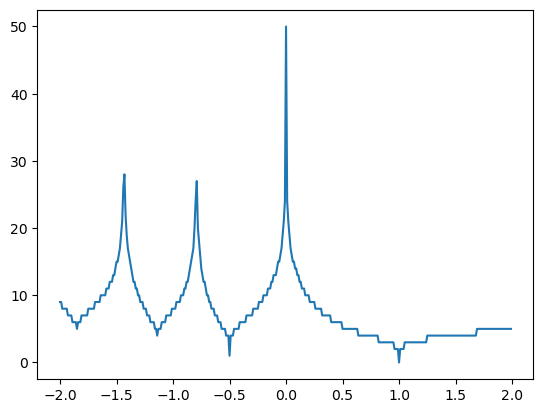

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#definición del método de Newton-Raphson
def nr(f,df,x0,tol=1e-5):
    k=0
    while np.abs(f(x0))>tol and k<50:
        x0=x0-f(x0)/df(x0)
        k=k+1
    return x0,k #devuelve la raíz y las iteraciones

#define la función y su derivada
f=lambda x:x**3-1
df=lambda x:3*x**2

x0=-2 #valor inicial
x=np.empty(400)
y=np.empty(400)
for i in range(400):
    x[i]=x0
    _,y[i]=nr(f,df,x0)
    x0=x0+0.01 #incrementa el valor inicial
plt.plot(x,y)
plt.show()


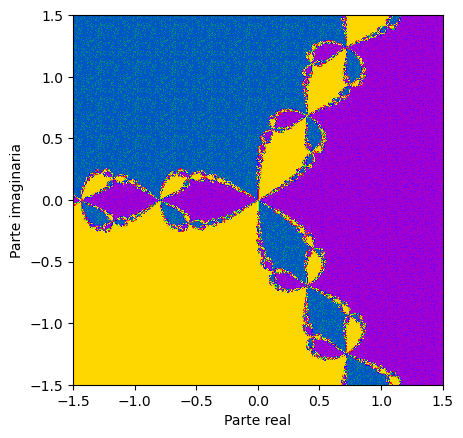

In [12]:
#!/usr/local/bin/python
#


# Cargamos las librerias, para asegurarnos de que la
# instalacion ha ido bien
import numpy as np
import matplotlib.pyplot as plt


# Primero definimos una funcion. Cambiar al gusto.
def f(z):
    if (z == complex(0.0)):
        return complex(0.0)
    #val = z**6 + z ** 3 - 1
    #val = z ** 3 - 2*z + 2
    val = z ** 3 - 1

    return val


# Devuelve el resultado del metodo de
# newton empezando en x y ek numero de
# iteraciones
def newton(x):
    h = 1.0e-8
    maxiter = 1000

    err = 100.0
    tol = 1.0e-7
    nit = 0
    while (err > tol):
        der = (f(x + h) - f(x - h)) / (2.0 * h)
        if (der == 0.0):
            return x, 0
        newx = x - f(x) / der
        err = abs(x - newx)
        x = newx
        nit = nit + 1
        if (nit == maxiter):
            return x, nit

    return x, nit


npt = 500
tol = 1.0e-5

x1 = -1.5
x2 = 1.5
hx = (x2 - x1) / npt

y1 = -1.5
y2 = 1.5
hy = (y2 - y1) / npt

nraices = 0
raices = np.zeros(1000, dtype=complex)
raices[0] = complex(0., 0.)
color = np.zeros((npt, npt))
xx = np.zeros(npt)
yy = np.zeros(npt)
for i in range(0, npt):
    xx[i] = x1 + i * hx
    for j in range(0, npt):
        yy[j] = y1 + j * hy
        z = complex(xx[i], yy[j])

        z, nit = newton(z)
        encontrado = False
        for k in range(1, nraices + 1):
            if (abs(z - raices[k]) < tol):
                encontrado = True
                nenc = k
                break

        if (encontrado):
            color[j, i] = float(nenc)
        else:
            print
            'anadida raiz: ', z, nit
            nraices = nraices + 1
            print
            nraices
            raices[nraices] = z
            color[i, j] = float(nraices)

#        print xx[i], yy[j], color[i,j]


CS = plt.imshow(color, cmap=plt.cm.prism , extent=(x1, x2, y1, y2))
plt.xlabel("Parte real")
plt.ylabel("Parte imaginaria")
# plt.colorbar()
plt.show()



## Ejemplo: Raices complejas para $f(x)=x^2-2$

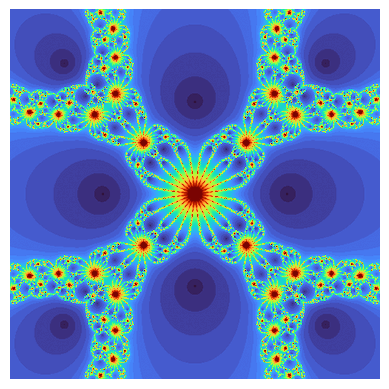

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#definición del método de Newton-Raphson
def nr(f,df,x0,tol=1e-5):
    k=0
    while np.abs(f(x0))>tol and k<50:
        x0=x0-f(x0)/df(x0)
        k=k+1
    return x0,k #devuelve la raíz y las iteraciones

#define la función y su derivada
f=lambda x:x**8+15*x**4-16
df=lambda x:8*x**7+60*x**3

re = np.linspace(-2, 2, 500) #rango de valores reales
im = np.linspace(-2, 2, 500) #rango de valores imaginarios

its=[]
datos = np.empty((len(re), len(im)))
for i in range(len(re)):
        for j in range(len(im)):
            x0=complex(re[i], im[j]) #crear el número complejo
            _,it = nr(f,df,x0) #corre el método y obtiene las iteraciones
            datos[i,j]=it #guarda el numero de iteraciones en el arreglo

#grafica el arreglo    
plt.imshow(datos.T, interpolation="spline36", cmap='turbo')
plt.axis('off')
# Guardar la imagen como PDF
plt.savefig('fractal_newton.pdf', format='pdf')
plt.show()
